In [1]:
!pip install aeon --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 15.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.


In [2]:
from aeon.datasets import load_regression, load_classification
from aeon.regression.feature_based import Catch22Regressor
from aeon.regression.deep_learning import FCNRegressor
from aeon.classification.feature_based import Catch22Classifier
from aeon.classification.deep_learning import FCNClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Classificação

## Datasets

Todos extraídos de: https://www.cs.ucr.edu/~eamonn/time_series_data_2018/

Mais informações em: https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.datasets.load_classification.html#aeon.datasets.load_classification

In [23]:
datasets = ['ArrowHead', 'GunPoint']

i = 1 # <------------------------------------------------------- Seleciona o dataset
ds_name = datasets[i]

# Carregando o dataset.
X_train, y_train = load_classification(ds_name, split="train")
X_test, y_test = load_classification(ds_name, split="test")

X_train = X_train
y_train = np.array([float(s) for s in y_train])
X_test = X_test
y_test = np.array([float(s) for s in y_test])

print(X_train.shape)

(50, 1, 150)


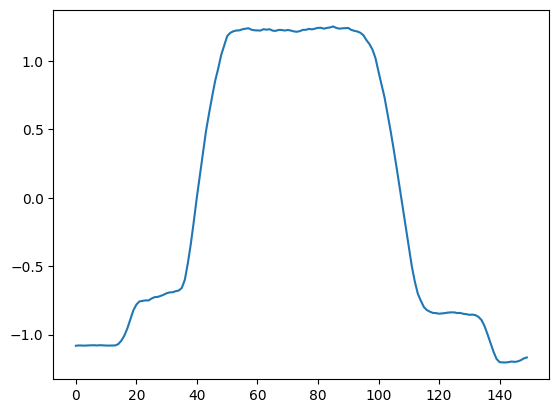

In [24]:
j = 27 # <------------------------------------------------------- Seleciona a instância do dataset
ts = X_train[j][0]

plt.plot(np.arange(len(ts)), ts)
plt.show()

## Treinamento

Catch22Classifier: https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.classification.feature_based.Catch22Classifier.html#aeon.classification.feature_based.Catch22Classifier

FCNClassifier: https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.classification.deep_learning.FCNClassifier.html#aeon.classification.deep_learning.FCNClassifier

In [25]:
results = {}
results['c22'] = {}
results['fcn'] = {}

In [30]:
clf = Catch22Classifier(estimator=RandomForestClassifier(n_estimators=5), outlier_norm=True, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

results['c22']['acc'] = accuracy_score(y_test, y_pred)
results['c22']['f1_macro'] = f1_score(y_test, y_pred, average='macro')
results['c22']['f1_micro'] = f1_score(y_test, y_pred, average='micro')

In [27]:
fcn = FCNClassifier(n_epochs=20, batch_size=4)
fcn.fit(X_train, y_train)
y_pred = fcn.predict(X_test)

results['fcn']['acc'] = accuracy_score(y_test, y_pred)
results['fcn']['f1_macro'] = f1_score(y_test, y_pred, average='macro')
results['fcn']['f1_micro'] = f1_score(y_test, y_pred, average='micro')

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


## Resultados

In [28]:
df = pd.DataFrame(results).T
print(df)

          acc  f1_macro  f1_micro
c22  0.846667  0.846605  0.846667
fcn  0.493333  0.330357  0.493333


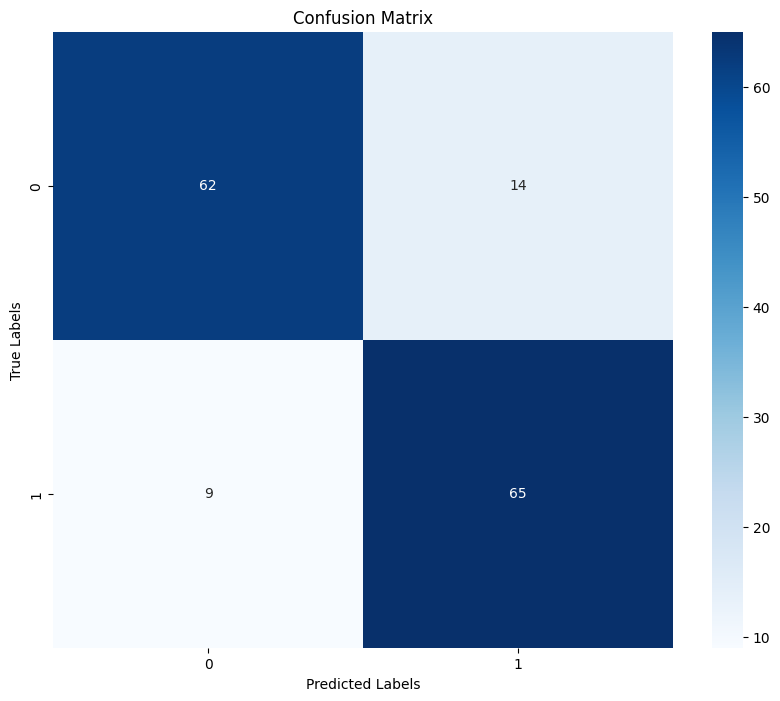

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Regressão Extrínseca

## Datasets

Todos extraídos de: http://tseregression.org/

Mais informações em: https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.datasets.load_regression.html#aeon.datasets.load_regression

In [32]:
datasets = ['Covid3Month', 'FloodModeling1']

i = 0 # <------------------------------------------------------- Seleciona o dataset
ds_name = datasets[i]

# Carregando o dataset.
X_train, y_train = load_regression(ds_name, split="train")
X_test, y_test = load_regression(ds_name, split="test")

X_train = X_train
y_train = np.array([float(s) for s in y_train])
X_test = X_test
y_test = np.array([float(s) for s in y_test])

print(X_train.shape)

(140, 1, 84)


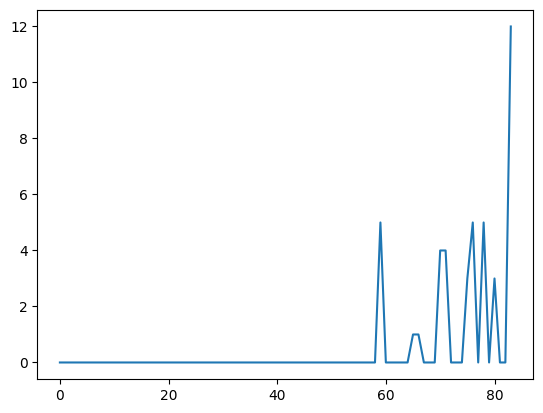

In [35]:
j = 0 # <------------------------------------------------------- Seleciona a instância do dataset
ts = X_train[j][0]

plt.plot(np.arange(len(ts)), ts)
plt.show()

## Treinamento

Catch22Regressor: https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.regression.feature_based.Catch22Regressor.html#aeon.regression.feature_based.Catch22Regressor

FCNRegressor: https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.regression.deep_learning.FCNRegressor.html#aeon.regression.deep_learning.FCNRegressor

In [37]:
results = {}
results['c22'] = {}
results['fcn'] = {}

In [38]:
reg = Catch22Regressor(estimator=RandomForestRegressor(n_estimators=10), outlier_norm=True, random_state=0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

results['c22']['mse'] = mse =  float(mean_squared_error(y_test, y_pred))
results['c22']['rmse'] = np.sqrt(mse)
results['c22']['mae'] = float(mean_absolute_error(y_test, y_pred))

In [39]:
rgs = FCNRegressor(n_epochs=200,batch_size=4)
rgs.fit(X_train, y_train)
y_pred = rgs.predict(X_test)

results['fcn']['mse'] = mse =  float(mean_squared_error(y_test, y_pred))
results['fcn']['rmse'] = np.sqrt(mse)
results['fcn']['mae'] = float(mean_absolute_error(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


## Resultados

In [40]:
df = pd.DataFrame(results).T
print(df)

          mse      rmse       mae
c22  0.001717  0.041437  0.031245
fcn  0.004690  0.068483  0.051728
